In [1]:
import cv2 as cv
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# This is needed to display the images.
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8, 8)

In [3]:
PATH_TO_CSV = '../annotations/bus_labels_resized.csv'
PATH_TO_LABELS = '../annotations/annotationsTrain.csv'
PATH_TO_IMAGES = '../images/resized/'
PATH_TO_CROPPED = '../images/cropped/'

In [7]:
labels = pd.read_csv(PATH_TO_LABELS)
labels = labels['class']
df = pd.read_csv(PATH_TO_CSV)
df['label'] = labels
grouped = df.groupby('filename')

In [8]:
df.head(12)

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,s_DSCF1013.JPG,300,225,bus,100,138,140,155,1
1,s_DSCF1013.JPG,300,225,bus,145,133,184,151,2
2,s_DSCF1013.JPG,300,225,bus,190,128,228,147,3
3,s_DSCF1013.JPG,300,225,bus,105,150,146,169,4
4,s_DSCF1013.JPG,300,225,bus,154,147,194,166,5
5,s_DSCF1013.JPG,300,225,bus,199,143,238,162,6
6,s_DSCF1015.JPG,300,225,bus,52,110,149,183,3
7,s_DSCF1015.JPG,300,225,bus,168,84,261,144,6
8,s_DSCF1016.JPG,300,225,bus,87,151,179,201,4
9,s_DSCF1016.JPG,300,225,bus,160,105,244,151,6


In [20]:
def label_to_color(label):
    dic = {1: 'Green', 2:'Yellow', 3:'White', 4:'Gray', 5:'Blue', 6:'Red'}
    return dic[label]

In [27]:
i = 0
j = 0 
cropped = {}
cropped['image'] = []
cropped['filename'] = []
cropped['label'] = []
for k, g in zip(grouped.groups.keys(), grouped.groups):
    img = cv.imread(os.path.join(PATH_TO_IMAGES, g))
    for idx, row in grouped.get_group(g).iterrows():
        temp = img[row['ymin']:row['ymax'], row['xmin']:row['xmax']]
        cropped['image'].append(temp)
        cropped['label'].append(row['label'])
        name = '{:03d}_pic.JPG'.format(j)
        cropped['filename'].append(name)
        path = os.path.join(PATH_TO_CROPPED, name)
        j = j + 1
        cv.imwrite(path, temp)

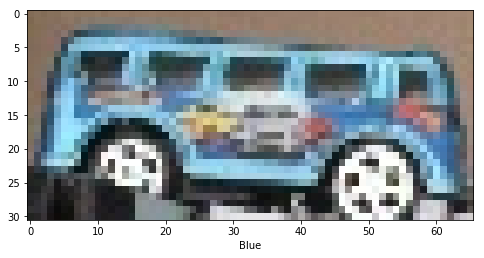

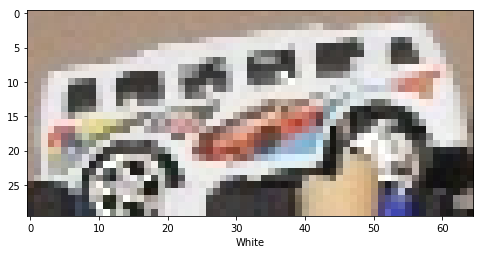

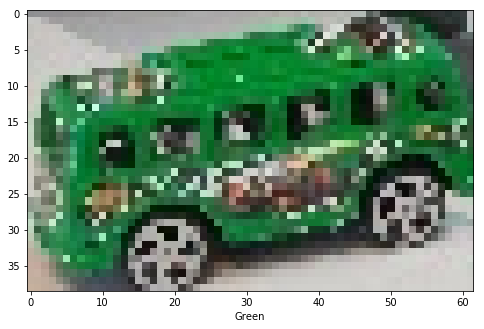

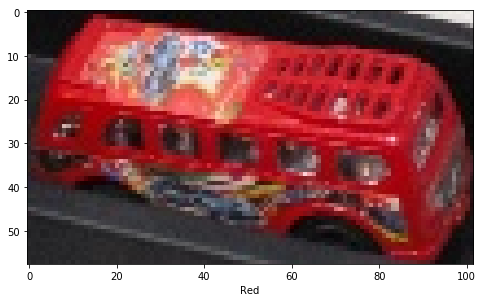

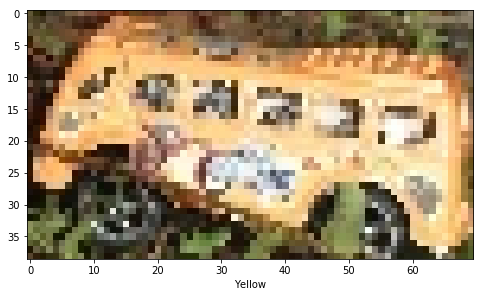

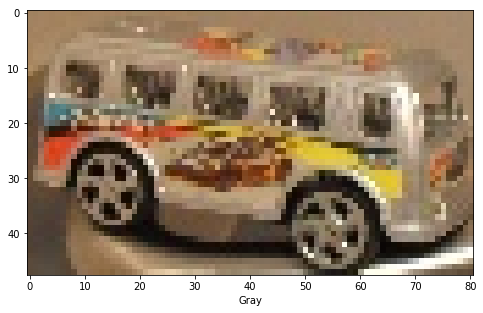

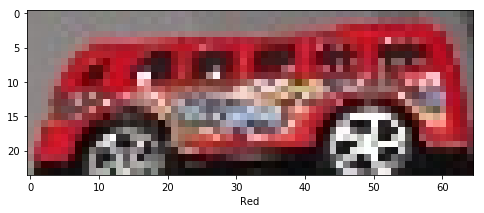

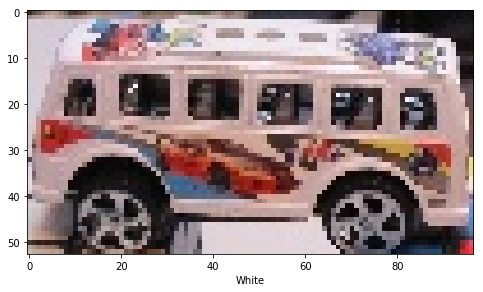

In [23]:
for img, lab in zip(cropped['image'][:8], cropped['label'][:8]):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure()
    plt.xlabel(label_to_color(lab))
    plt.imshow(img)

In [41]:
df_cropped = pd.DataFrame(cropped)
df_cropped.drop('image', axis=1, inplace=True)
df_cropped['color'] = df_cropped['label'].apply(label_to_color)

In [42]:
df_cropped.head(5)

,filename,label,color
0,000_pic.JPG,5,Blue
1,001_pic.JPG,3,White
2,002_pic.JPG,1,Green
3,003_pic.JPG,6,Red
4,004_pic.JPG,2,Yellow


In [43]:
df_cropped.to_csv('../annotations/cropped_color_label.csv', index=False)